In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [5]:
32*32*3

3072

In [6]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [7]:
import matplotlib.pyplot as plt

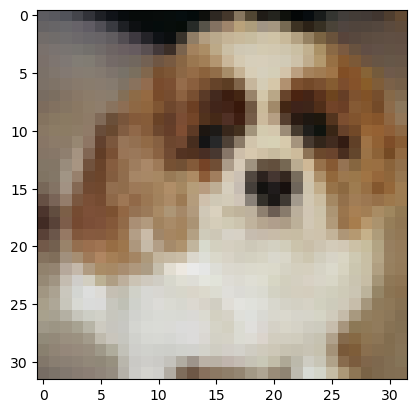

In [8]:
plt.imshow(X_train[32425])
plt.show()

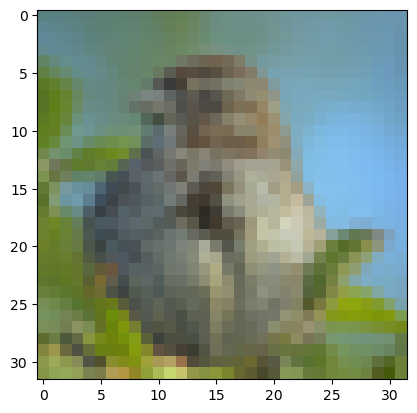

In [35]:
plt.imshow(X_train[39096])
plt.show()

In [10]:
y_train[3245]

array([2], dtype=uint8)

In [11]:
X_train=X_train/255.0
X_test=X_test/255.0

In [12]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [13]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [14]:
model=Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512,activation="relu"),
    Dense(256,activation="relu"),
    Dense(10,activation="softmax")
])

In [15]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [16]:
model.fit(X_train,y_train,epochs=50,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/50


391/391 [==============================] - 11s 22ms/step - loss: 1.9091 - accuracy: 0.3178 - val_loss: 1.7478 - val_accuracy: 0.3784
Epoch 2/50
391/391 [==============================] - 8s 20ms/step - loss: 1.6921 - accuracy: 0.3943 - val_loss: 1.6196 - val_accuracy: 0.4230
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 1.6003 - accuracy: 0.4290 - val_loss: 1.5855 - val_accuracy: 0.4401
Epoch 4/50
391/391 [==============================] - 6s 15ms/step - loss: 1.5403 - accuracy: 0.4490 - val_loss: 1.5150 - val_accuracy: 0.4645
Epoch 5/50
391/391 [==============================] - 7s 18ms/step - loss: 1.4942 - accuracy: 0.4684 - val_loss: 1.5758 - val_accuracy: 0.4331
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 1.4608 - accuracy: 0.4796 - val_loss: 1.4934 - val_accuracy: 0.4669
Epoch 7/50
391/391 [==============================] - 8s 20ms/step - loss: 1.4196 - accuracy: 0.4958 - val_loss: 1.4361 - val_accuracy: 0.4

In [17]:
from tensorflow.keras.preprocessing import image

In [18]:
img_path=r"C:\Users\trupt\Downloads\istockphoto-155439315-612x612.jpg"

In [19]:
img=image.load_img(img_path,target_size=(32,32))

In [20]:
img_array=image.img_to_array(img)

In [21]:
img_array=np.expand_dims(img_array,axis=0)

In [36]:
pred=model.predict(img_array)

1/1 [==============================] - 0s 39ms/step


In [38]:
np.argmax(pred)

9